# Performance analysis of number-power with Python

In [249]:
import math
import timeit

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Custom CSS

In [4]:
from IPython.display import HTML
from pathlib import Path

# load custom CSS for old-fashioned dataframe style
css_rules = Path('custom.css').read_text()
HTML('<style>' + css_rules + '</style>')

## Settings

In [178]:
BASE_RANGE = range(1, 101)
EXPONENT_RANGE = range(1, 101)
NUM_EXECUTIONS = 1000

## Data generation

In [215]:
data_dasterisk = []
data_pow = []
for base in BASE_RANGE:
    data_row_dasterisk = []
    data_row_pow = []
    for exponent in EXPONENT_RANGE:
        elapsed_time = timeit.timeit(f'{base} ** {exponent}', globals=globals(), number=NUM_EXECUTIONS)
        data_row_dasterisk.append(elapsed_time)
        elapsed_time = timeit.timeit(f'math.pow({base}, {exponent})', globals=globals(), number=NUM_EXECUTIONS)
        data_row_pow.append(elapsed_time)
    data_dasterisk.append(data_row_dasterisk)
    data_pow.append(data_row_pow)

#### Dataframe creation

In [236]:
# index = base
# columns = exponent
df_dasterisk = pd.DataFrame(data_dasterisk, columns=EXPONENT_RANGE, index=BASE_RANGE)
df_pow = pd.DataFrame(data_pow, columns=EXPONENT_RANGE, index=BASE_RANGE)

# POSITIVE VALUES: dasterisk is faster than pow
# NEGATIVE VALUES: pow is faster than dasterisk
df_delta = df_pow - df_dasterisk

#### Discretize differences

In [242]:
# 0: dasterisk is faster than pow
# 1: pow is faster than dasterisk
df_delta_discretized = df_delta.copy()
df_delta_discretized[df_delta_discretized > 0] = 0
df_delta_discretized[df_delta_discretized < 0] = 1

## Plot data

#### Preparing data to be plotted

In [243]:
# transpose data to plot correctly base in x-axis and exponent in y-axis
# reverse rows to plot x-axis with lower exponents
aux = df_delta_discretized.T[::-1]

#### Create custom colormap

In [250]:
colors = ['#9edae5', '#1f77b4']    # azul claro, azul oscuro
cmap = mpl.colors.ListedColormap(colors)

#### Plot itself

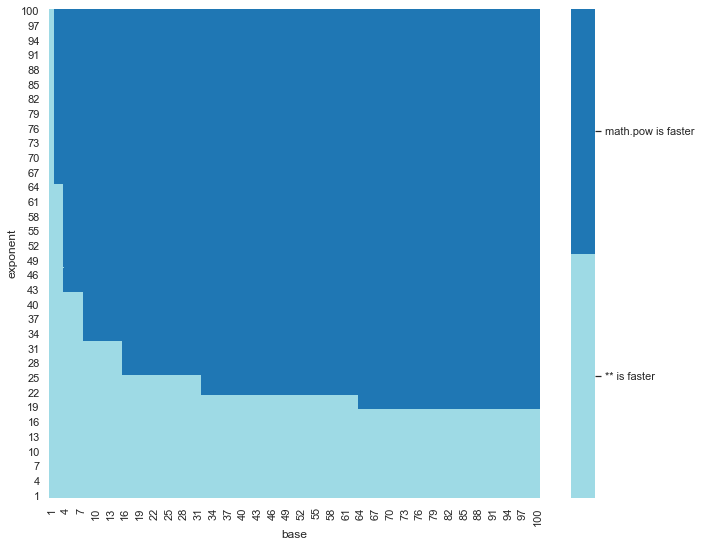

In [256]:
sns.set(style='white')
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(aux, cmap=cmap)

cbar = ax.collections[0].colorbar
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(['** is faster', 'math.pow is faster'])

ax.set_xlabel('base')
ax.set_ylabel('exponent');

## Comparing mean values

In [262]:
mean_dasterisk = df_dasterisk.values.mean()
mean_pow = df_pow.values.mean()

In [264]:
(mean_pow / mean_dasterisk) * 100

34.65278446636752

> On average, `math.pow(a, b)` is about 35% faster than `a ** b`